# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-

In [6]:
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [7]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.dropna(how='any', inplace=True)

In [11]:
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
31475,24,Private,198914,HS-grad,9,Never-married,Sales,Unmarried,Black,Male,0,0,25,United-States,<=50K
20974,26,Private,213081,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,Jamaica,<=50K
24163,31,Private,178841,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24501,25,Private,216724,HS-grad,9,Divorced,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
14272,47,Local-gov,37672,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States,<=50K
13128,29,Private,203833,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,40,United-States,<=50K
4770,52,Self-emp-inc,51048,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
30607,18,Self-emp-inc,101061,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,70,United-States,<=50K
31736,29,Private,261725,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,35,United-States,<=50K
12392,31,Local-gov,144949,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K


In [12]:
df.shape

(30162, 15)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.000,38.438,13.135,17.000,28.000,37.000,47.000,90.000
fnlwgt,30162.000,189793.834,105652.972,13769.000,117627.250,178425.000,237628.500,1484705.000
education.num,30162.000,10.121,2.550,1.000,9.000,10.000,13.000,16.000
capital.gain,30162.000,1092.008,7406.346,0.000,0.000,0.000,0.000,99999.000
capital.loss,30162.000,88.372,404.298,0.000,0.000,0.000,0.000,4356.000
hours.per.week,30162.000,40.931,11.980,1.000,40.000,40.000,45.000,99.000


In [14]:
df.describe(include='object').T

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital.status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native.country,30162,41,United-States,27504
income,30162,2,<=50K,22654


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
df.income.value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [19]:
num_features = df.select_dtypes(exclude=object).columns
cat_features = df.select_dtypes(include=object).columns

In [20]:
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [21]:
num_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week']

In [22]:
cat_features = ['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country']

In [23]:
X = df.drop('income', axis=1)
y = df.income

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Preprocessiong for Numeric Features
numerical_transformer = Pipeline(steps=[
     #('imputer', SimpleImputer(strategy='mean')),  # Eksik veri doldurma
   ('scaler', StandardScaler())]) # Özellik ölçeklendirme

# Preprocessiong for Categorical Features
categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Eksik veri doldurma
     ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One-hot encoding



# ColumnTransformer ile farklı türdeki özellikler için ön işleme
preprocessor = ColumnTransformer(
   transformers=[
        ('num', numerical_transformer, num_features),
       ('cat', categorical_transformer, cat_features)
    ])



In [47]:
# Pipeline for Logistic Regression
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('LogisticRegression', LogisticRegression())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {
    'LogisticRegression__C': np.logspace(-1, 5, 20),
    'LogisticRegression__penalty': ["l1", "l2"]}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring = "f1_micro")

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir
# Örneğin: pipe_grid.fit(X_train, y_train)

In [48]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital.status',
                                                                          'occup...
             param_grid={'LogisticRegression__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'LogisticRegression__penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [49]:
pipe_grid.best_params_

{'LogisticRegression__C': 0.1, 'LogisticRegression__penalty': 'l2'}

In [50]:
pipe_model.set_params(LogisticRegression__C = 0.1, LogisticRegression__penalty =  'l2')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('feature_selection', SelectKBest()),
                ('LogisticRegression', LogisticRegression(C=0.1))])

In [51]:
y_pred = pipe_grid.predict(X_test)
y_pred

array(['>50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [62]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4222  309]
 [ 663  839]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      4531
        >50K       0.73      0.56      0.63      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.76      6033
weighted avg       0.83      0.84      0.83      6033


Train_Set
[[16812  1311]
 [ 2673  3333]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     18123
        >50K       0.72      0.55      0.63      6006

    accuracy                           0.83     24129
   macro avg       0.79      0.74      0.76     24129
weighted avg       0.83      0.83      0.83     24129



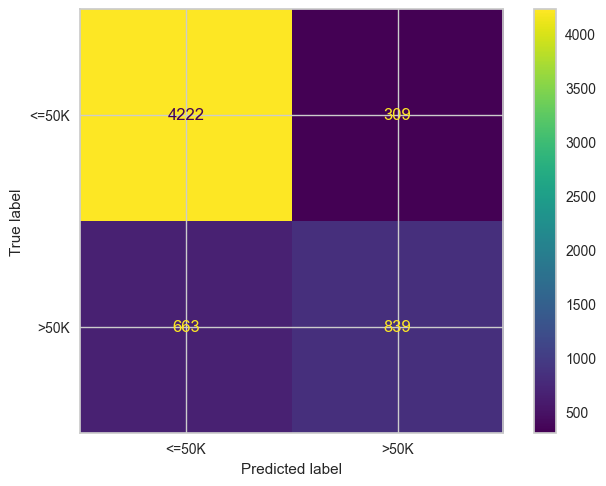

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe_grid, X_test, y_test);

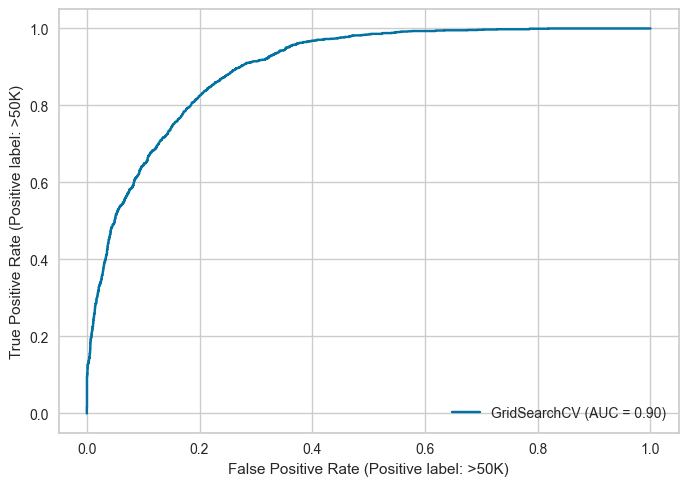

In [70]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe_grid, X_test, y_test);

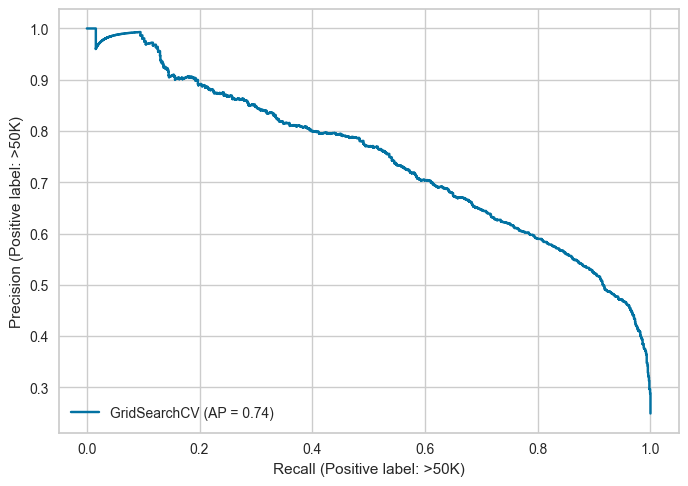

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(pipe_grid, X_test, y_test);

# K-Nearest Neighbors (KNN) Classification

In [79]:
# Pipeline for KNN
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('KNN', KNeighborsClassifier())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {"KNN__n_neighbors":range(1, 30), 
              "KNN__p": [1, 2], 
              "KNN__weights": ["uniform", "distance"]}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring = "f1_micro")

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir
# Örneğin: pipe_grid.fit(X_train, y_train)

In [80]:
pipe_grid.fit(X_train, y_train)

# Support Vector Classifier

In [ ]:
# Pipeline for SVM
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('SVM', SVC())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {"KNN__n_neighbors":range(1, 30), 
              "KNN__p": [1, 2], 
              "KNN__weights": ["uniform", "distance"]}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring = "f1_micro")

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir